In [28]:
import torch
w = torch.tensor(4.0, requires_grad=True)
a = w * 3
l = a ** 2
l.backward()
print(w.grad)

tensor(72.)


In [29]:
#linear regression
x_train = torch.FloatTensor([[1, 2], [3, 2], [3, 7], [1, 1], [1, 0]])
y_train = torch.FloatTensor([[4], [8], [23], [1], [-2]])
w = torch.randn(2, 1)
b = torch.randn(1)
print(w, b)

lr = 0.01
for epoch in range(3001):
    w.requires_grad_(True)
    b.requires_grad_(True)
    
    h = x_train @ w + b
    cost = ((h - y_train) ** 2).mean()
    
    cost.backward()
    
    with torch.no_grad():
        w = w - lr * w.grad
        b = b - lr * b.grad
        
        if epoch % 100 == 0:
            print(epoch, cost.item(), w.squeeze(), b)

tensor([[ 0.5060],
        [-0.0581]]) tensor([0.9194])
0 98.21588897705078 tensor([0.8214, 0.5945]) tensor([1.0216])
100 1.9781043529510498 tensor([0.4977, 3.1472]) tensor([-1.0084])
200 0.9576786756515503 tensor([0.7853, 3.2057]) tensor([-1.9505])
300 0.491412878036499 tensor([1.1136, 3.1588]) tensor([-2.5415])
400 0.2525363564491272 tensor([1.3628, 3.1152]) tensor([-2.9557])
500 0.12978298962116241 tensor([1.5430, 3.0827]) tensor([-3.2515])
600 0.06669775396585464 tensor([1.6724, 3.0593]) tensor([-3.4634])
700 0.03427721560001373 tensor([1.7651, 3.0425]) tensor([-3.6153])
800 0.017615653574466705 tensor([1.8316, 3.0305]) tensor([-3.7242])
900 0.009052936919033527 tensor([1.8793, 3.0218]) tensor([-3.8023])
1000 0.004652451723814011 tensor([1.9135, 3.0157]) tensor([-3.8583])
1100 0.002391018206253648 tensor([1.9380, 3.0112]) tensor([-3.8984])
1200 0.0012287864228710532 tensor([1.9555, 3.0080]) tensor([-3.9272])
1300 0.0006314880447462201 tensor([1.9681, 3.0058]) tensor([-3.9478])
1400

In [30]:
import torch  
x_train=torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train=torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [31]:
#linear_regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

x = [[1, 2], [3, 2], [3, 7], [1, 1], [1, 0]]
y = [[4], [8], [23], [1], [-2]]

lr.fit(x, y)
#실제로 scikit-learn에서 구하는 coef(w)와 intercept(b)는 경사하강법이 아니다. 
print(lr.coef_, lr.intercept_)

x_test = [[5, 10], [2, 7], [10, 3]]
y_test = lr.predict(x_test)
print(y_test)

[[2. 3.]] [-4.]
[[36.]
 [21.]
 [25.]]


In [32]:
#bce를 통한 분류

bce = torch.nn.BCELoss()

import math
w = torch.randn(1, 1)
b = torch.randn(1, 1)

lr = 1.0

for epoch in range(3001):
    w.requires_grad_(True)
    b.requires_grad_(True)
    
    h = torch.sigmoid(x_train @ w + b)
    # h = 1 / (1 + math.e ** (-(x_train @ w + b)))
    
    # cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))
    cost = bce(h, y_train)
    cost.backward()
    
    with torch.no_grad():
        w = w - lr * w.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(epoch, cost.item(), w.item(), b.item())
            

0 1.9661803245544434 -1.0364898443222046 1.916930079460144
100 0.41272544860839844 -1.5784704685211182 4.797499179840088
200 0.39630356431007385 -1.9716253280639648 5.995969295501709
300 0.38971826434135437 -2.224031686782837 6.759653091430664
400 0.38642463088035583 -2.4036364555358887 7.300878524780273
500 0.38458773493766785 -2.5382494926452637 7.705493450164795
600 0.3834940493106842 -2.6423490047454834 8.01784896850586
700 0.38281455636024475 -2.7245430946350098 8.264164924621582
800 0.3823793828487396 -2.7903997898101807 8.461336135864258
900 0.3820943534374237 -2.8437418937683105 8.620923042297363
1000 0.3819044828414917 -2.887302875518799 8.751173973083496
1100 0.3817765414714813 -2.923100471496582 8.858162879943848
1200 0.3816891610622406 -2.952665328979492 8.946491241455078
1300 0.38162922859191895 -2.9771792888641357 9.019708633422852
1400 0.3815877437591553 -2.997572183609009 9.08060359954834
1500 0.3815588653087616 -3.0145821571350098 9.13138484954834
1600 0.38153871893882

In [33]:
x_test = torch.FloatTensor([[4.5], [1.1]])    
test_result = torch.sigmoid(x_test @ w + b)

# print(test_result)
print(torch.round(test_result))


tensor([[0.],
        [1.]])


In [34]:
w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

# optimizer = torch.optim.Adam([w, b], lr=1.0)
# optimizer = torch.optim.SGD([w, b], lr=1.0)
optimizer = torch.optim.RMSprop([w, b], lr=0.1)


for epoch in range(3001):
    
    h = torch.sigmoid(x_train @ w + b)
    cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))
    
    #누적된 기울기 초기화
    optimizer.zero_grad()
    #기울기, 편향 계산
    cost.backward()
    
    #가중치 업데이트
    optimizer.step()
    
    with torch.no_grad():

        if epoch % 100 == 0:
            print(epoch, cost.item(), w.item(), b.item())

0 1.8934297561645508 0.13298237323760986 -0.7817929983139038
100 0.39995619654655457 -1.8660157918930054 5.685833930969238
200 0.38508322834968567 -2.507239580154419 7.5969390869140625
300 0.38249969482421875 -2.7933225631713867 8.434892654418945
400 0.38236042857170105 -2.9616315364837646 8.872175216674805
500 0.3837880790233612 -3.0678250789642334 9.095926284790039
600 0.38470616936683655 -3.1221742630004883 9.228002548217773
700 0.384000301361084 -3.141711711883545 9.313289642333984
800 0.3838374614715576 -3.1554179191589355 9.358614921569824
900 0.38397887349128723 -3.165482997894287 9.382452964782715
1000 0.3840128183364868 -3.1706461906433105 9.396854400634766
1100 0.3839809000492096 -3.173128128051758 9.405549049377441
1200 0.38397660851478577 -3.1747119426727295 9.410340309143066
1300 0.38398441672325134 -3.175713539123535 9.413006782531738
1400 0.3839852511882782 -3.176248550415039 9.414586067199707
1500 0.3839837610721588 -3.1765382289886475 9.415507316589355
1600 0.383983939

In [35]:
#softmax
import torch
import torch.nn.functional as F
import torch.nn as nn

x_train = torch.tensor([ [1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5],
                            [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7] ], dtype=torch.float)
y_train = torch.tensor([ 2, 2, 2, 1, 1, 1, 0, 0], dtype=torch.long)

# W = torch.randn(4, 3, requires_grad=True)
# b = torch.randn(1, 3, requires_grad=True)

# optim = torch.optim.Adam([W, b], lr=0.1)
model = nn.Linear(4, 3)
optim = torch.optim.Adam(model.parameters(), lr=0.1)
for epoch in range(3001):
    
    # h = torch.mm(x_train, W) + b
    h = model(x_train)
    #cost 계산
    
    cost = F.cross_entropy(h, y_train)
    
    optim.zero_grad()
    cost.backward()
    optim.step()
    
    with torch.no_grad():
        if epoch % 100 == 0:
            print(f"epoch:{epoch}, cost:{cost.item()}") 

epoch:0, cost:3.1676323413848877
epoch:100, cost:0.3585580587387085
epoch:200, cost:0.23475299775600433
epoch:300, cost:0.16226305067539215
epoch:400, cost:0.1186661571264267
epoch:500, cost:0.09060386568307877
epoch:600, cost:0.071439228951931
epoch:700, cost:0.057746630162000656
epoch:800, cost:0.047616273164749146
epoch:900, cost:0.0399090014398098
epoch:1000, cost:0.03390829265117645
epoch:1100, cost:0.029144342988729477
epoch:1200, cost:0.02529846504330635
epoch:1300, cost:0.022148355841636658
epoch:1400, cost:0.0195352453738451
epoch:1500, cost:0.0173430684953928
epoch:1600, cost:0.015485765412449837
epoch:1700, cost:0.013898130506277084
epoch:1800, cost:0.012530193664133549
epoch:1900, cost:0.01134306751191616
epoch:2000, cost:0.010306219570338726
epoch:2100, cost:0.00939520075917244
epoch:2200, cost:0.008590583689510822
epoch:2300, cost:0.007876329123973846
epoch:2400, cost:0.007239482365548611
epoch:2500, cost:0.006669358815997839
epoch:2600, cost:0.006157008931040764
epoch:27

In [36]:
import numpy as np
from sklearn.linear_model import LogisticRegression

x_train = np.array([ [1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5],
                            [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7] ])
y_train = np.array([ 2, 2, 2, 1, 1, 1, 0, 0])

#y 에 0, 1, 2 등 둘 이상의 class가 존재 => softmax regression
model = LogisticRegression(penalty=None)

model.fit(x_train, y_train)

x_test = np.array([[1, 11, 10, 9], [1, 3, 4, 3], [1, 1, 0, 1]])
model.predict(x_test)



array([0, 1, 2])

In [37]:
#softmax
x_train = torch.tensor([ [1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5],
                            [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7] ], dtype=torch.float)
y_train = torch.tensor([[0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], 
                       [0,1,0], [1,0,0], [1,0,0]], dtype=torch.float)

W = torch.randn(4, 3, requires_grad=True)
b = torch.randn(1, 3, requires_grad=True)

optim = torch.optim.Adam([W, b], lr=0.1)

for epoch in range(3001):
    #어디를 합을 1로 만들건지(dim=0 or 1)
    h = torch.softmax(torch.mm(x_train, W) + b, dim=1)   
    #cost 계산
    cost = -torch.mean(torch.sum(y_train * torch.log(h), dim=1))
    
    optim.zero_grad()
    cost.backward()
    optim.step()
    
    with torch.no_grad():
        if epoch % 100 == 0:
            print(f"epoch:{epoch}, cost:{cost.item()}") 

epoch:0, cost:5.839266300201416


epoch:100, cost:0.24948230385780334
epoch:200, cost:0.144336998462677
epoch:300, cost:0.09242567420005798
epoch:400, cost:0.06418627500534058
epoch:500, cost:0.04728551208972931
epoch:600, cost:0.036374010145664215
epoch:700, cost:0.028905823826789856
epoch:800, cost:0.023556703701615334
epoch:900, cost:0.01958436332643032
epoch:1000, cost:0.01654687151312828
epoch:1100, cost:0.014167857356369495
epoch:1200, cost:0.012266527861356735
epoch:1300, cost:0.010720808990299702
epoch:1400, cost:0.009445848874747753
epoch:1500, cost:0.008380793035030365
epoch:1600, cost:0.0074812378734350204
epoch:1700, cost:0.00671401945874095
epoch:1800, cost:0.006054043769836426
epoch:1900, cost:0.00548198726028204
epoch:2000, cost:0.004982654005289078
epoch:2100, cost:0.004544231109321117
epoch:2200, cost:0.0041569811291992664
epoch:2300, cost:0.0038132902700453997
epoch:2400, cost:0.0035068022552877665
epoch:2500, cost:0.003232380375266075
epoch:2600, cost:0.0029856355395168066
epoch:2700, cost:0.00276306

In [38]:
x_test = torch.tensor([[1, 11, 10, 9], [1, 3, 4, 3], [1, 1, 0, 1]], dtype=torch.float)

h = torch.softmax(torch.mm(x_test, W) + b, dim = 1)    

In [39]:
import torch
import torch.nn.functional as F

# 입력 데이터 준비 (logits)
logits = torch.tensor([[2.0, 1.0, 0.1],
                       [1.0, 3.0, 0.2],
                       [0.5, 1.5, 2.0]])

# 소프트맥스 적용
softmax_probs = F.softmax(logits, dim=1)

print("소프트맥스 확률 출력:")
print(softmax_probs)


소프트맥스 확률 출력:
tensor([[0.6590, 0.2424, 0.0986],
        [0.1131, 0.8360, 0.0508],
        [0.1220, 0.3315, 0.5465]])


In [40]:
#softmax
import numpy as np
from sklearn.linear_model import LogisticRegression

x_train = np.array([ [1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5],
                            [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7] ])
y_train = np.array([ 2, 2, 2, 1, 1, 1, 0, 0])

model = LogisticRegression(penalty=None)

model.fit(x_train, y_train)

x_test = np.array([[1, 11, 10, 9], [1, 3, 4, 3], [1, 1, 0, 1]])
model.predict(x_test)

array([0, 1, 2])

In [41]:
#cross entropy
import torch
import torch.nn as nn

# 다중 클래스 예제 (CrossEntropyLoss)
y_true = torch.tensor([2, 0])  # 실제 값 (원-핫 인코딩이 아님, 클래스 인덱스로 전달)
y_pred = torch.tensor([[0.1, 0.3, 0.6], [0.7, 0.2, 0.1]])  # 예측 값 (로짓 값)

criterion = nn.CrossEntropyLoss()
loss = criterion(y_pred, y_true)
print(f"Cross Entropy 손실: {loss.item()}")

# 이진 분류 예제 (BCELoss)
y_true_binary = torch.tensor([1.0, 0.0, 1.0])  # 실제 값
y_pred_binary = torch.tensor([0.9, 0.1, 0.8])  # 예측 값

bce_criterion = nn.BCELoss()
bce_loss = bce_criterion(y_pred_binary, y_true_binary)
print(f"Binary Cross Entropy 손실: {bce_loss.item()}")


Cross Entropy 손실: 0.8106180429458618
Binary Cross Entropy 손실: 0.14462153613567352


In [42]:
import torch
import torch.nn as nn
import torch.optim as optim

# 데이터셋 준비
x_train = torch.tensor([[1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [0.0, 0.0]])
y_train = torch.tensor([0, 1, 2, 3])  # 클래스 레이블 (0, 1, 2, 3)

# 모델 정의
class SoftmaxClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SoftmaxClassifier, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  # 입력과 출력 연결

    def forward(self, x):
        return self.linear(x)

model = SoftmaxClassifier(input_dim=2, output_dim=4)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # 내부적으로 Softmax 포함
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam Optimizer 사용

# 학습 반복 (Epoch Loop)
epochs = 500
for epoch in range(epochs):
    # Forward Propagation
    output = model(x_train)

    # 손실 계산
    loss = criterion(output, y_train)

    # Gradient 초기화, Backpropagation, 가중치 업데이트
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 중간 결과 출력
    if epoch % 50 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

# 테스트
test_input = torch.tensor([[1.0, 0.0]])  # 새로운 데이터 예측
test_output = model(test_input)
predicted_class = torch.argmax(test_output, dim=1)
print(f"Predicted class for {test_input}: {predicted_class.item()}")


Epoch [0/500], Loss: 1.2751
Epoch [50/500], Loss: 0.8543
Epoch [100/500], Loss: 0.5934
Epoch [150/500], Loss: 0.4299
Epoch [200/500], Loss: 0.3243
Epoch [250/500], Loss: 0.2531
Epoch [300/500], Loss: 0.2032
Epoch [350/500], Loss: 0.1670
Epoch [400/500], Loss: 0.1398
Epoch [450/500], Loss: 0.1189
Predicted class for tensor([[1., 0.]]): 0


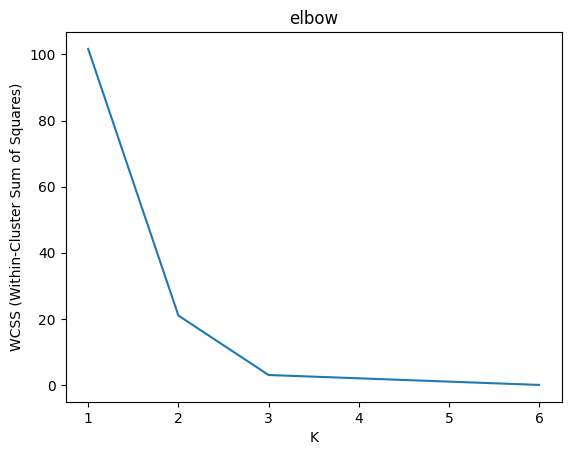

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# 데이터 포인트 정의
data = np.array([[1, 2], [2, 1], [4, 5], [5, 4], [8, 8], [9, 9]])

# WCSS 저장 리스트
wcss = []

# 다양한 K 값에 대해 K-Means 수행 (데이터 포인트 개수를 초과하지 않도록 설정)
for k in range(1, len(data) + 1):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# 엘보우 방법을 위한 그래프 그리기
plt.plot(range(1, len(data) + 1), wcss)
plt.title('elbow')
plt.xlabel('K')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [44]:
import numpy as np

X = []
Y = []
for line in open("iris.data", "r"):
    line = line.rstrip()
    if line == "": continue

    *x, y = line.split(",")
    x = [float(i) for i in x]
    X.append(x)
    Y.append(y)
    

labels = list(set(Y))
Y = [labels.index(y) for y in Y]

X = np.array(X)
Y = np.array(Y)

In [45]:
class KNNClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X, Y):
        self.X = X
        self.Y = Y

    def predict(self, queries):
        Y = []
        for q in queries:
            dists = np.linalg.norm(self.X - q, axis = 1)
            knns= np.argsort(dists)[:self.k]
            counts = np.bincount(self.Y[knns])
            Y.append(np.argmax(counts))

        return np.array(Y)

In [46]:
perm = np.random.permutation(len(X))
n_trains = int(len(X) * 0.8)
X_train = X[perm[:n_trains]]
Y_train = Y[perm[:n_trains]]
X_test = X[perm[n_trains:]]
Y_test = Y[perm[n_trains:]]

knn = KNNClassifier(5)
knn.fit(X_train, Y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print("Train accuracy:", (pred_train == Y_train).mean())
print("Test accuracy:", (pred_test == Y_test).mean())

Train accuracy: 0.9916666666666667
Test accuracy: 0.9
